In [4]:
from scipy.spatial import ConvexHull
import numpy as np

class Polyhedron:
    def __init__(self, H=None, He=None, V=None, R=None, A=None, b=None, F=None, vars=None):
        """
        Initialize Polyhedron object.
        Can be constructed using V-representation, H-representation, or YALMIP constraints.
        """
        if V is not None:
            self.from_vertices(V, R)
        elif A is not None and b is not None:
            self.from_inequalities(A, b)
        elif F is not None and vars is not None:
            self.from_yalmip(F, vars)
        elif H is not None or He is not None:
            self.from_general_form(H, He)
        else:
            raise ValueError("Insufficient parameters to construct Polyhedron.")
        
    def from_vertices(self, V, R=None):
        """
        Construct Polyhedron from V-representation.
        """
        hull = ConvexHull(V)
        self.A = hull.equations[:, :-1]
        self.b = -hull.equations[:, -1]
        
    def from_inequalities(self, A, b):
        """
        Construct Polyhedron from H-representation.
        """
        self.A = A
        self.b = b
    
    def from_general_form(self, H, He):
        """
        Construct Polyhedron from general form.
        """
        if H is not None:
            self.A = H[:, :-1]
            self.b = -H[:, -1]
        if He is not None:
            self.Ae = He[:, :-1]
            self.be = -He[:, -1]
    
    def from_yalmip(self, F, vars):
        """
        Construct Polyhedron from YALMIP constraints.
        TODO: Implement this method based on how YALMIP constraints are represented in Python.
        """
        pass  # Implementation depends on how YALMIP constraints are represented in Python


# Example Usage
V = np.array([[0, 0], [1, 0], [0, 1]])
poly = Polyhedron(V=V)
print(poly.A, poly.b)  # Should print the H-representation of the polyhedron

A = np.array([[-1, 0], [0, -1], [1, 1]])
b = np.array([0, 0, 1])
poly = Polyhedron(A=A, b=b)
print(poly.A, poly.b)  

[[-0.      -1.     ]
 [-1.       0.     ]
 [ 0.70711  0.70711]] [-0.       0.       0.70711]
[[-1  0]
 [ 0 -1]
 [ 1  1]] [0 0 1]


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math

In [14]:
x= np.random.rand(100,1)
y= np.random.rand(100,1)
legend_list = []

In [13]:
def setup_plot_env():
    fig, ax = plt.subplots(figsize=(7, 7))
    np.set_printoptions(precision = 8, suppress = True)
    return fig, ax

def show_legend(fig, ax):
    #plot legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="lower right")
    fig.show()
    

def forceAspect(ax, aspect=1):
    ax.set_aspect('equal')
    
def plot_random_points_pivot(fig, ax, x, y, pivot_pair_num):
    #plotting the random point matrix
    ax.scatter(x,y,c="orange", label="random points")
    #pick the first point to plot the voronoi diagram of
    ax.scatter(x[pivot_pair_num],y[pivot_pair_num],c="blue", label="pivot point")
    fig.show()
    #define a global variable to store the euclidean distance of the all the points in the set S with respect to s
    global euc_dis, midpoints, slopes
    euc_dis = [] # this is the list of euclidean distances to midpoints between pivot and random point
    midpoints = [] # this is the list of midpoints
    slopes = [] # this is the list of slopes to random points (and NOT the slope of perpendicular bisectors)
    
def comp_euc_dis(point, midpoint):
    return math.sqrt((point[0]-midpoint[0])** 2 +  (point[1]-midpoint[1])** 2)

def compute_delimiter_slope_midpoint(pivot,xy):
    midpoint = (float((pivot[0]+xy[0])/2),float((pivot[1]+xy[1])/2))
    try:
        slope = float((pivot[1] - xy[1]) / (pivot[0] - xy[0]))
    except:
        slope = nan
    return slope,midpoint

#plotting perpendicular bisectors wrt the chosen point
def plot_perpendicular_bisector(fig,ax,x, y, pivot_pair_num):
    xy_list = np.array([x,y], np.float64).T.reshape(np.size(x),2)
    #print(xy_list.shape)
    #print(xy_list)
    for xy in xy_list:
        slope,midpoint = compute_delimiter_slope_midpoint((x[pivot_pair_num],y[pivot_pair_num]),xy)
        euc_dis.append(comp_euc_dis(xy,midpoint))
        midpoints.append(midpoint)
        slopes.append(slope)
        if((xy[0] != midpoint[0]) and (xy[1] != midpoint[1])):
            ax.scatter(midpoint[0],midpoint[1], c="purple", label="midpoints")
        ax.axline(midpoint, slope=-1/slope, linestyle="solid",color = "green", linewidth=0.2,
                  label="perpendicular bisector")
    #print(euc_dis)
    forceAspect(ax,aspect=1)
    show_legend(fig, ax)

/tmp/ipykernel_3918/592071451.py:22: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_3918/592071451.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  midpoint = (float((pivot[0]+xy[0])/2),float((pivot[1]+xy[1])/2))
/tmp/ipykernel_3918/592071451.py:35: RuntimeWarning: invalid value encountered in divide
  slope = float((pivot[1] - xy[1]) / (pivot[0] - xy[0]))
/tmp/ipykernel_3918/592071451.py:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  slope = float((pivot[1] - xy[1]) / (pivot[0] - xy[0]))
/tmp/ipykernel_3918/592

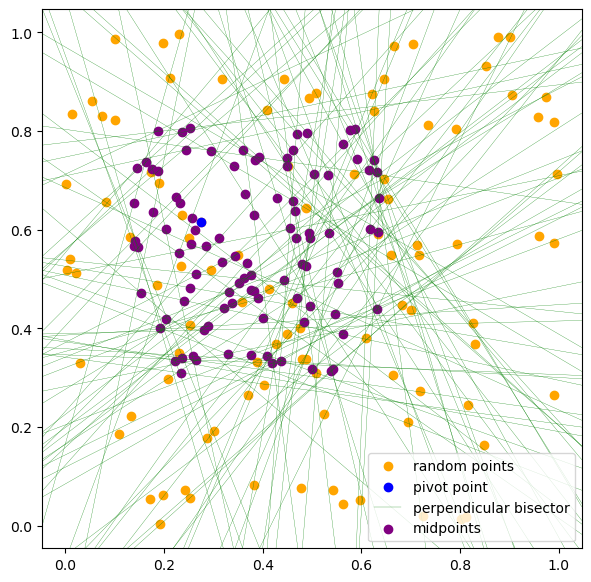

In [15]:
fig, ax = setup_plot_env()
pivot_pair_num = 0
plot_random_points_pivot(fig, ax, x, y, pivot_pair_num)
plot_perpendicular_bisector(fig, ax, x, y, 0)
euc_dis = np.array(euc_dis)

In [5]:
def point_line_arbl(x,y,index):
    s = y - midpoints[index][1] + (1/slopes[index])*(x-midpoints[index][0])    
    return s
def point_line_d_arbl(ax,x,y,index):
    s = y - midpoints[index][1]  -(slopes[index])*(x-midpoints[index][0]) 
    midpoint = (x,y)
    #ax.axline(midpoint, slope=slopes[index], linestyle="solid",color = "red", linewidth=0.4,
     #             label="slope checker")
    return s  

In [6]:
def argminexp(arr,exp):
    p = np.array(arr)
    excptIndx = exp
    m = np.zeros(p.size, dtype=bool)
    m[excptIndx] = True
    a = np.ma.array(p, mask=m)
    return (np.argmin(a))

def no_duplicate(exception_list):
    #if len(exception_list[1:]) == len(set(exception_list[1:])):
    if len(exception_list) < 10:
        return True
    else:
        return False
    
exception_list = [0] # for the zeroth pass in zeroth index

In [7]:
#for the first pass
#extracting the index of midpoint closest to pivot => closest halfplane
cl_ind = argminexp(euc_dis,exception_list)
exception_list.append(cl_ind) # for the first pass in the first index
ax.scatter(midpoints[cl_ind][0],midpoints[cl_ind][1], c="black", label="closest midpoints")
show_legend(fig, ax)

/tmp/ipykernel_3918/592071451.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [8]:
s_rot_perv = 0
s_rot = 0
while(no_duplicate(exception_list)):
    #determine point-halfplane 2 to n
    # determine the position of pivot {a - above / r - right | b - below / l - left} w.r.t. the first point-halfplane
    s=point_line_arbl(x[pivot_pair_num],y[pivot_pair_num],cl_ind)
    hpp_mask = []
    #find midpoints indices on the same side of pivot wrt current point-halfplane
    for (p,q) in midpoints:
        if(point_line_arbl(p,q,cl_ind)*s > 0):
            hpp_mask.append(1) 
        else:
            hpp_mask.append(np.inf)
    hpp_mask = np.array(hpp_mask)
    cl_ind = argminexp(hpp_mask*euc_dis, exception_list)
    #print(cl_ind)
    #print(-1/slopes[cl_ind])
    s_rot = point_line_d_arbl(ax,midpoints[cl_ind][0],midpoints[cl_ind][1],exception_list[1])
    if(s_rot_perv*s_rot < 0):
        exception_list[1] = 0
    s_rot_perv = s_rot
    ax.scatter(midpoints[cl_ind][0],midpoints[cl_ind][1], c="cyan", label="closest midpoints")
    exception_list.append(cl_ind)

/tmp/ipykernel_3918/2008984488.py:15: RuntimeWarning: invalid value encountered in multiply
  cl_ind = argminexp(hpp_mask*euc_dis, exception_list)
